# **Import Library**

Kode di bawah terdiri dari serangkaian pernyataan import yang membawa library dan modul spesifik untuk manipulasi data, visualisasi, dan machine learning. Dokumentasi :

- import pandas as pd = Mengimpor pustaka pandas untuk manipulasi data dengan alias pd

- pd.set_option('display.max_columns', None) = Mengatur pandas untuk menampilkan semua kolom DataFrame

- import numpy as np = Mengimpor pustaka numpy untuk operasi numerik dengan alias np

- from collections import Counter = Mengimpor Counter untuk menghitung frekuensi elemen

- import ast = Mengimpor pustaka ast untuk memproses string literal Python

- import matplotlib.pyplot as plt = Mengimpor modul matplotlib untuk visualisasi dasar dengan alias plt

- import seaborn as sns = Mengimpor pustaka seaborn untuk visualisasi statistik dengan alias sns

- from sklearn.feature_extraction.text import TfidfVectorizer = Mengimpor TfidfVectorizer untuk ekstraksi fitur teks berbasis TF-IDF

- from sklearn.metrics.pairwise import cosine_similarity = Mengimpor cosine_similarity untuk menghitung kemiripan antar dokumen atau vektor teks

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from collections import Counter
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# **Upload Data dari Kaggle**

Kode pada bagian ini adalah serangkaian perintah yang digunakan di lingkungan Google Colab untuk mengunggah file kredensial Kaggle, mengunduh dataset dari Kaggle, mengekstrak file dataset, dan memuat serta menampilkan informasi dasar tentang dataset tersebut.

- from google.colab import files = Mengimpor modul files dari Google Colab untuk mengunggah file dari perangkat lokal

- files.upload() = Membuka dialog untuk mengunggah file, seperti kaggle.json untuk autentikasi Kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmadzulzhafran","key":"5686cda5cf3ae2a4d173988f5d2bc804"}'}

- mkdir -p ~/.kaggle = Membuat direktori .kaggle di sistem jika belum ada

- !cp kaggle.json ~/.kaggle/ = Menyalin file kaggle.json ke direktori .kaggle untuk autentikasi

- !chmod 600 ~/.kaggle/kaggle.json = Mengatur izin file kaggle.json agar hanya dapat diakses pemilik untuk keamanan

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

- !kaggle datasets download -d marlesson/myanimelist-dataset-animes-profiles-reviews = Mengunduh dataset Anime Dataset with Reviews - MyAnimeList dari Kaggle

In [4]:
!kaggle datasets download -d marlesson/myanimelist-dataset-animes-profiles-reviews

Dataset URL: https://www.kaggle.com/datasets/marlesson/myanimelist-dataset-animes-profiles-reviews
License(s): CC0-1.0
 91% 198M/217M [00:00<00:00, 184MB/s]
100% 217M/217M [00:00<00:00, 240MB/s]


- !unzip -q myanimelist-dataset-animes-profiles-reviews.zip -d myanimelist = Mengekstrak file zip dataset ke direktori myanimelist secara senyap

In [5]:
!unzip -q myanimelist-dataset-animes-profiles-reviews.zip -d myanimelist

- df = pd.read_csv('/content/myanimelist/animes.csv') = Memuat file CSV dari dataset ke dalam DataFrame Pandas bernama df

In [6]:
df = pd.read_csv('/content/myanimelist/animes.csv')

# **Data Understanding**

Menampilkan informasi struktur DataFrame seperti jumlah baris, kolom, tipe data, dan nilai yang hilang

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


Menampilkan DataFrame

In [8]:
df

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


Kode ini mem-parsing string genre dari DataFrame menggunakan ast.literal_eval dan meratakan daftar genre menjadi satu daftar. Kemudian, menghitung frekuensi setiap genre dengan Counter dan mencetak 10 genre paling umum.

In [9]:
import ast
from collections import Counter

def parse_genre(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        if isinstance(genres, list):
            return [g.strip() for g in genres]
        else:
            return []
    except:
        return []

genre_lists = df['genre'].dropna().apply(parse_genre)

flat_genres = [genre for sublist in genre_lists for genre in sublist]

genre_counts = Counter(flat_genres)

print(genre_counts.most_common(10))


[('Comedy', 6461), ('Action', 4215), ('Fantasy', 3466), ('Adventure', 3143), ('Drama', 3004), ('Sci-Fi', 2832), ('Hentai', 2574), ('Kids', 2549), ('Shounen', 2322), ('Romance', 2152)]


Kode ini membuat visualisasi barplot menggunakan Seaborn untuk menampilkan 10 genre anime terpopuler berdasarkan frekuensi dari DataFrame, dengan genre di sumbu y dan jumlah anime di sumbu x.

<ipython-input-10-3b69887b940e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette='viridis')


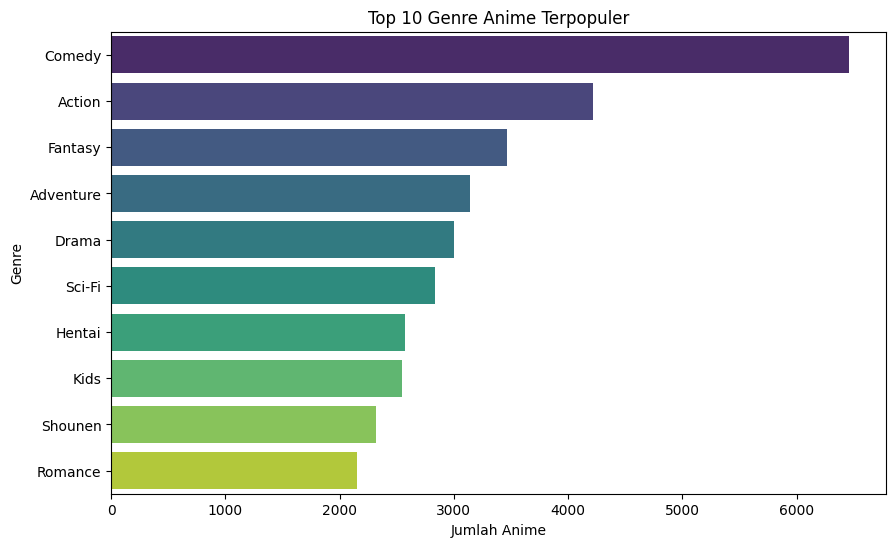

In [10]:
genre_series = df['genre'].dropna().apply(parse_genre)
flat_genres = [genre for sublist in genre_series for genre in sublist]

genre_counts = Counter(flat_genres)

# top 10 genre paling umum
top_10 = genre_counts.most_common(10)

genres, counts = zip(*top_10)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(genres), palette='viridis')
plt.title('Top 10 Genre Anime Terpopuler')
plt.xlabel('Jumlah Anime')
plt.ylabel('Genre')
plt.show()


Kode ini mencetak ringkasan statistik (seperti rata-rata, standar deviasi, minimum, maksimum, dan kuartil) dari kolom 'score', 'ranked', 'popularity', dan 'episodes' pada DataFrame df menggunakan metode describe().

In [11]:
print(df[['score', 'ranked', 'popularity', 'episodes']].describe())

              score        ranked    popularity      episodes
count  18732.000000  16099.000000  19311.000000  18605.000000
mean       6.436107   6866.524194   7720.830304     11.460414
std        1.007941   4390.018768   4676.786104     47.950386
min        1.250000      1.000000      1.000000      1.000000
25%        5.770000   2895.500000   3725.000000      1.000000
50%        6.410000   6963.000000   7539.000000      2.000000
75%        7.150000  10601.500000  11613.000000     12.000000
max        9.230000  14675.000000  16338.000000   3057.000000


# **Data Preparation**

Kode ini memilih kolom 'uid', 'title', dan 'genre' dari DataFrame df dan mengganti nama kolom 'uid' menjadi 'anime_id' secara langsung pada DataFrame. Operasi ini menyederhanakan DataFrame dengan hanya menyimpan kolom yang relevan dan memperbarui nama kolom untuk konsistensi.

In [12]:
# Ambil hanya kolom yang dibutuhkan
df = df[['uid', 'title', 'genre']]
df.rename(columns={'uid': 'anime_id'}, inplace=True)

<ipython-input-12-ae7228492fb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'uid': 'anime_id'}, inplace=True)


Kode ini menghitung jumlah nilai null di setiap kolom DataFrame df menggunakan metode isnull().sum().

In [13]:
df.isnull().sum()

,0
anime_id,0
title,0
genre,0


Kode ini mengurutkan DataFrame df berdasarkan kolom 'anime_id' secara ascending, lalu mereset indeks DataFrame tanpa menyimpan indeks lama, dan menyimpan hasilnya ke dalam fix_df.

In [14]:
fix_df = df.sort_values(by='anime_id').reset_index(drop=True)
fix_df

,anime_id,title,genre
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc..."
1,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc..."
2,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']"
3,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']"
4,6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D..."
...,...,...,...
19306,40938,Hige wo Soru. Soshite Joshikousei wo Hirou.,"['Drama', 'Romance']"
19307,40956,Enen no Shouboutai: Ni no Shou,"['Action', 'Supernatural', 'Shounen']"
19308,40957,Shin Chuuka Ichiban! 2,"['Comedy', 'Shounen']"
19309,40957,Shin Chuuka Ichiban! 2,"['Comedy', 'Shounen']"


Kode ini mendefinisikan fungsi clean_genre yang mem-parsing string genre menggunakan ast.literal_eval, mengambil genre pertama dari daftar jika ada, atau mengembalikan np.nan jika gagal atau daftar kosong, lalu menerapkannya pada kolom 'genre' di DataFrame fix_df.

In [15]:
def clean_genre(genre_str):
    try:
        genre_list = ast.literal_eval(genre_str)
        if isinstance(genre_list, list) and len(genre_list) > 0:
            return genre_list[0]
        else:
            return np.nan
    except:
        return np.nan

fix_df['genre'] = fix_df['genre'].apply(clean_genre)
fix_df

,anime_id,title,genre
0,1,Cowboy Bebop,Action
1,1,Cowboy Bebop,Action
2,5,Cowboy Bebop: Tengoku no Tobira,Action
3,5,Cowboy Bebop: Tengoku no Tobira,Action
4,6,Trigun,Action
...,...,...,...
19306,40938,Hige wo Soru. Soshite Joshikousei wo Hirou.,Drama
19307,40956,Enen no Shouboutai: Ni no Shou,Action
19308,40957,Shin Chuuka Ichiban! 2,Comedy
19309,40957,Shin Chuuka Ichiban! 2,Comedy


Kode ini menghitung jumlah nilai NaN di setiap kolom DataFrame fix_df menggunakan metode isna().sum().

In [16]:
fix_df.isna().sum()

,0
anime_id,0
title,0
genre,82


Kode ini digunakan untuk menghapus baris yang memiliki nilai kosong (NaN) pada kolom 'genre' dan mengatur ulang indeks dataframe. Perintah fix_df.isna().sum() kemudian digunakan untuk menghitung jumlah nilai kosong di setiap kolom dalam dataframe setelah pembersihan tersebut.

In [17]:
fix_df = fix_df.dropna(subset=['genre']).reset_index(drop=True)
fix_df.isna().sum()

,0
anime_id,0
title,0
genre,0


Kode ini digunakan untuk mengganti semua spasi dalam nilai kolom 'genre' dengan garis bawah (_) agar lebih konsisten dan mudah digunakan dalam analisis data.

In [18]:
fix_df['genre'] = fix_df['genre'].str.replace(' ', '_')

Perintah ini digunakan untuk menampilkan daftar nilai unik yang ada dalam kolom 'genre' pada dataframe fix_df. Ini berguna untuk melihat variasi atau kategori yang berbeda dalam kolom tersebut setelah melakukan manipulasi data seperti penggantian spasi dengan garis bawah.

In [19]:
fix_df.genre.unique()

array(['Action', 'Adventure', 'Comedy', 'Slice_of_Life', 'Drama',
       'Sci-Fi', 'Samurai', 'Game', 'Harem', 'Military', 'Space', 'Music',
       'Mecha', 'Supernatural', 'Historical', 'Mystery', 'School',
       'Hentai', 'Fantasy', 'Ecchi', 'Horror', 'Kids', 'Sports',
       'Dementia', 'Magic', 'Romance', 'Police', 'Psychological', 'Cars',
       'Shounen', 'Demons', 'Parody', 'Shoujo', 'Super_Power', 'Vampire',
       'Martial_Arts', 'Yaoi', 'Thriller', 'Seinen', 'Josei',
       'Shounen_Ai'], dtype=object)

Kode ini digunakan untuk menghitung jumlah baris duplikat dalam dataframe fix_df.

In [20]:
fix_df.duplicated().sum()

np.int64(3088)

Perintah ini digunakan untuk menghapus baris duplikat dalam dataframe fix_df dan kemudian mengatur ulang indeks dataframe agar tetap urut setelah penghapusan duplikat. print(fix_df.shape) akan menampilkan ukuran dataframe setelah penghapusan duplikat, yang terdiri dari jumlah baris dan kolom.

In [21]:
fix_df = fix_df.drop_duplicates().reset_index(drop=True)
print(fix_df.shape)

(16141, 3)


Kode ini mengubah kolom-kolom 'anime_id', 'title', dan 'genre' dari dataframe fix_df menjadi list Python menggunakan metode .tolist(). Kemudian, print(len(anime_id)), print(len(anime_name)), dan print(len(anime_genre)) digunakan untuk menampilkan panjang (jumlah elemen) dari masing-masing list, yaitu jumlah ID anime, nama anime, dan genre anime dalam dataframe setelah diproses.

In [22]:
anime_id = fix_df['anime_id'].tolist()

anime_name = fix_df['title'].tolist()

anime_genre = fix_df['genre'].tolist()

print(len(anime_id))
print(len(anime_name))
print(len(anime_genre))

16141
16141
16141


Kode ini membuat sebuah DataFrame baru bernama anime_new dengan menggunakan tiga list yang telah dibuat sebelumnya: anime_id, anime_name, dan anime_genre. Setiap list akan menjadi kolom di DataFrame dengan nama kolom 'id', 'anime_title', dan 'anime_genre' masing-masing.

In [23]:
# Membuat dictionary
anime_new = pd.DataFrame({
    'id': anime_id,
    'anime_title': anime_name,
    'anime_genre': anime_genre
})
anime_new

,id,anime_title,anime_genre
0,1,Cowboy Bebop,Action
1,5,Cowboy Bebop: Tengoku no Tobira,Action
2,6,Trigun,Action
3,7,Witch Hunter Robin,Action
4,8,Bouken Ou Beet,Adventure
...,...,...,...
16136,40936,Ore wo Suki nano wa Omae dake ka yo: Oretachi ...,Comedy
16137,40938,Hige wo Soru. Soshite Joshikousei wo Hirou.,Drama
16138,40956,Enen no Shouboutai: Ni no Shou,Action
16139,40957,Shin Chuuka Ichiban! 2,Comedy


Perintah ini digunakan untuk mengambil 5 baris acak dari DataFrame data (yang dalam hal ini adalah anime_new).

In [24]:
data = anime_new
data.sample(5)

,id,anime_title,anime_genre
12378,34589,"Onihei: Sono Otoko, Heizou Hasegawa",Historical
14654,38260,Kunoichi Botan,Hentai
4909,7245,Sekai Meisaku Douwa: Wow! Maerchen Oukoku,Fantasy
1956,2153,Saint Beast: Kouin Jojishi Tenshi Tan,Fantasy
14358,37814,Inazuma Eleven: Reloaded - Soccer no Henkaku,Sports


# **Modeling**

Kode ini menginisialisasi TfidfVectorizer untuk menghitung nilai TF-IDF pada kolom 'anime_genre' dalam DataFrame. Fungsi fit() digunakan untuk memproses dan menghitung IDF dari genre-genre anime yang ada. Setelah itu, get_feature_names_out() mengembalikan daftar kata unik yang ditemukan selama proses tokenisasi, yang mewakili fitur untuk setiap genre anime.

In [25]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer(token_pattern=r"(?u)\b[\w\-]+\b")

# Melakukan perhitungan idf pada data cuisine
tf.fit(data['anime_genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons',
       'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai',
       'historical', 'horror', 'josei', 'kids', 'magic', 'martial_arts',
       'mecha', 'military', 'music', 'mystery', 'parody', 'police',
       'psychological', 'romance', 'samurai', 'school', 'sci-fi',
       'seinen', 'shoujo', 'shounen', 'shounen_ai', 'slice_of_life',
       'space', 'sports', 'super_power', 'supernatural', 'thriller',
       'vampire', 'yaoi'], dtype=object)

Perintah ini menghitung dan mengubah kolom 'anime_genre' menjadi matriks TF-IDF. Fungsi fit_transform() tidak hanya menghitung IDF, tetapi juga mengubah teks menjadi representasi vektor numerik berdasarkan nilai TF-IDF. tfidf_matrix.shape kemudian akan menampilkan ukuran matriks hasil transformasi, yaitu jumlah baris (anime) dan jumlah fitur (kata-kata unik) yang teridentifikasi dalam genre.

In [26]:
tfidf_matrix = tf.fit_transform(data['anime_genre'])
tfidf_matrix.shape

(16141, 41)

Perintah ini mengubah matriks sparse hasil dari fit_transform() menjadi matriks dense (penuh) yang lebih mudah dibaca.

In [27]:
tfidf_matrix.todense()

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Kode ini membuat DataFrame yang menampilkan matriks TF-IDF dalam bentuk yang lebih mudah dibaca, dengan anime titles sebagai indeks (baris) dan kata-kata unik dari genre sebagai kolom. Dengan sample(22, axis=1) dan sample(15, axis=0), hanya 22 kolom dan 15 baris yang diambil secara acak untuk ditampilkan, memberikan gambaran sekilas tentang nilai TF-IDF di antara genre dan anime yang berbeda.

In [28]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan genre anime
# Baris diisi dengan judul anime

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.anime_title
).sample(22, axis=1).sample(15, axis=0)

,space,shounen,fantasy,mystery,supernatural,slice_of_life,martial_arts,magic,hentai,harem,horror,thriller,game,drama,vampire,cars,samurai,sci-fi,historical,music,josei,shoujo
anime_title,,,,,,,,,,,,,,,,,,,,,,
Chiisana Jumbo,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Seikaisuru Kado: Beyond Information,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Dragon Ball Z Special 1: Tatta Hitori no Saishuu Kessen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Straw-saurus Neo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MapleStory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hasan de Ageru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xiao Lu He Xiao Lan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kero Kero Keroppi no Yowamushi-ouji no Daibouken,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Momo Kyun Sword,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Perintah cosine_sim = cosine_similarity(tfidf_matrix) menghitung kemiripan kosinus antar anime berdasarkan matriks TF-IDF yang telah dihitung sebelumnya.

In [29]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

Kode ini membuat DataFrame cosine_sim_df yang menampilkan matriks kemiripan kosinus antar anime, dengan judul anime sebagai indeks dan kolom. cosine_sim_df.shape menunjukkan ukuran matriks, yaitu jumlah anime (baris) dan anime lainnya (kolom) yang terlibat dalam perhitungan kemiripan. Perintah sample(5, axis=1).sample(10, axis=0) akan memilih 5 kolom dan 10 baris secara acak untuk ditampilkan, memberi gambaran sekilas tentang kemiripan antar anime.

In [30]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['anime_title'], columns=data['anime_title'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (16141, 16141)


anime_title,Shin Hakkenden,Apron Hero,Uchuu Kaizoku Captain Herlock: Arcadia-gou no Nazo,Rokujouma no Shinryakusha!?,Frame Arms Girl Movie: Kyakkya Ufufu na Wonderland
anime_title,,,,,
Queen's Blade: Gyokuza wo Tsugu Mono,1.0,0.0,1.0,0.0,1.0
Habatake Pii-tan,0.0,0.0,0.0,0.0,0.0
Muhyo to Rouji no Mahouritsu Soudan Jimusho,1.0,0.0,1.0,0.0,1.0
Shin Kachikachi Yama,0.0,0.0,0.0,0.0,0.0
Lalala Lala-chan ★Uchuu ni Muchuu★,0.0,0.0,0.0,0.0,0.0
Anitore! EX,0.0,0.0,0.0,1.0,0.0
Sora yori mo Tooi Basho,0.0,0.0,0.0,0.0,0.0
Ninja Senshi Tobikage,0.0,0.0,0.0,0.0,0.0
Isekai Cheat Magician,1.0,0.0,1.0,0.0,1.0


# **Mendapatkan Rekomendasi**

Fungsi anime_recommendations memberikan rekomendasi anime berdasarkan kemiripan genre dengan anime yang diberikan. Fungsi ini mencari k anime teratas yang paling mirip menggunakan matriks kemiripan kosinus, menghapus anime yang dicari, dan mengembalikan informasi tentang anime tersebut beserta genre-nya. Hasilnya adalah daftar anime yang memiliki genre serupa dengan anime input.

In [31]:
def anime_recommendations(judul_anime, similarity_data=cosine_sim_df, items=data[['anime_title', 'anime_genre']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe

    Parameter:
    ---
    judul_anime : tipe data string (str)
                Nama Anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan anime sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,judul_anime].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop judul_anime agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(judul_anime, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Perintah data[data.anime_title.eq('Cowboy Bebop')] digunakan untuk mencari dan menampilkan baris dalam DataFrame data yang memiliki judul anime "Cowboy Bebop". Fungsi .eq() adalah cara untuk memeriksa apakah nilai dalam kolom 'anime_title' sama dengan "Cowboy Bebop", dan hasilnya adalah baris yang sesuai dengan kriteria tersebut.

In [32]:
data[data.anime_title.eq('Cowboy Bebop')]

,id,anime_title,anime_genre
0,1,Cowboy Bebop,Action


Kode ini pertama-tama mengambil genre dari anime yang diberikan ('Cowboy Bebop') dengan mencari nilai genre pada DataFrame fix_df, dan kemudian menyimpan genre tersebut dalam variabel input_genre. Setelah itu, fungsi anime_recommendations digunakan untuk mencari 10 anime yang paling mirip berdasarkan genre dari anime yang diberikan, dengan k=10 menunjukkan jumlah rekomendasi yang ingin dihasilkan.

In [33]:
input_anime = 'Cowboy Bebop'
input_genre = fix_df[fix_df['title'] == input_anime]['genre'].values[0]

recommendations = anime_recommendations(input_anime, k=10)
recommendations

,anime_title,anime_genre
0,RideBack,Action
1,Code Geass: Hangyaku no Lelouch Picture Drama ...,Action
2,Kouya no Shounen Isamu,Action
3,Code Geass: Hangyaku no Lelouch Special Editio...,Action
4,Shikabane Hime: Aka,Action
5,Time Bokan Oudou Fukko,Action
6,Cobra The Animation: The Psycho-Gun,Action
7,Tengen Toppa Gurren Lagann Movie 2: Lagann-hen,Action
8,Battle Girl High School,Action
9,Peace Maker Kurogane Movie 1: Omou Michi,Action


# **Evaluasi**

Kode ini menghitung precision untuk rekomendasi anime dengan membandingkan jumlah anime yang relevan (memiliki genre yang sama dengan "Cowboy Bebop") terhadap total jumlah rekomendasi. Precision yang lebih tinggi menunjukkan kualitas rekomendasi yang lebih baik, yaitu semakin banyak rekomendasi yang relevan. Hasilnya dicetak dengan dua angka desimal.

In [34]:
genre_cb = data[data['anime_title'] == 'Cowboy Bebop']['anime_genre'].values[0]

relevan = recommendations[recommendations['anime_genre'] == genre_cb]

# Hitung precision
precision = len(relevan) / len(recommendations)

print("Precision:", round(precision, 2))


Precision: 1.0
